# Spam SMS Prediction Case Study

### Problem Statement:
We have data containing sms and the class they belong to ie. spam/ham. We need a classifier model which can classify the sms into ham or spam class.

## Naive Bayes Model

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the sms data:
df=pd.read_table('D:\Machine_Learning And AI\MachineLearning\SMS Case Study\SMSSpamCollection.txt',header=None,names=['Class','sms'])
df

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# Assigning spam and ham as 1 and 0:
df['Class']=df['Class'].replace({'spam':1,'ham':0})
df

,Class,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [5]:
# Train test split
df_train,df_test=train_test_split(df,train_size=0.7,random_state=1)
df_train

,Class,sms
4393,0,what are your new years plans?
216,0,Finally the match heading towards draw as your...
4471,0,"Lemme know when I can swing by and pick up, I'..."
3889,0,ok....take care.umma to you too...
5030,1,I'd like to tell you my deepest darkest fantas...
...,...,...
905,0,"We're all getting worried over here, derek and..."
5192,0,Oh oh... Den muz change plan liao... Go back h...
3980,0,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
235,1,Text & meet someone sexy today. U can find a d...


In [6]:
# Converting to array:
df_train=df_train.values
df_test=df_test.values
df_train

array([[0, 'what are your new years plans?'],
       [0, 'Finally the match heading towards draw as your prediction.'],
       [0,
        "Lemme know when I can swing by and pick up, I'm free basically any time after 1 all this semester"],
       ...,
       [0,
        'CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C YA 2MORO! WHO NEEDS BLOKES'],
       [1,
        'Text & meet someone sexy today. U can find a date or even flirt its up to U. Join 4 just 10p. REPLY with NAME & AGE eg Sam 25. 18 -msg recd@thirtyeight pence'],
       [0, 'K k:) sms chat with me.']], dtype=object)

In [7]:
X_train=df_train[:,1]
y_train=df_train[:,0].astype('int')
X_test=df_test[:,1]
y_test=df_test[:,0].astype('int')
X_train

array(['what are your new years plans?',
       'Finally the match heading towards draw as your prediction.',
       "Lemme know when I can swing by and pick up, I'm free basically any time after 1 all this semester",
       ...,
       'CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C YA 2MORO! WHO NEEDS BLOKES',
       'Text & meet someone sexy today. U can find a date or even flirt its up to U. Join 4 just 10p. REPLY with NAME & AGE eg Sam 25. 18 -msg recd@thirtyeight pence',
       'K k:) sms chat with me.'], dtype=object)

In [8]:
cv=CountVectorizer(stop_words='english')

In [9]:
# Compressed Sparse Row format:
X_train_transformed=cv.fit_transform(X_train,y_train)
X_test_transformed=cv.transform(X_test)
print(X_train_transformed)

  (0, 4272)	1
  (0, 6855)	1
  (0, 4682)	1
  (1, 2550)	1
  (1, 3930)	1
  (1, 3018)	1
  (1, 2202)	1
  (1, 4801)	1
  (2, 3650)	1
  (2, 3548)	1
  (2, 5957)	1
  (2, 4644)	1
  (2, 2663)	1
  (2, 1119)	1
  (2, 6163)	1
  (2, 5369)	1
  (3, 4406)	1
  (3, 1485)	1
  (3, 6353)	1
  (4, 3685)	1
  (4, 6043)	1
  (4, 2000)	1
  (4, 1949)	1
  (4, 2478)	1
  (4, 222)	1
  :	:
  (3897, 1542)	1
  (3897, 5026)	1
  (3897, 2207)	1
  (3897, 1386)	1
  (3897, 1252)	1
  (3898, 3472)	1
  (3898, 3435)	1
  (3898, 4148)	1
  (3898, 6074)	1
  (3898, 5115)	1
  (3898, 799)	1
  (3898, 6196)	1
  (3898, 243)	1
  (3898, 5399)	1
  (3898, 344)	1
  (3898, 295)	1
  (3898, 4584)	1
  (3898, 3966)	1
  (3898, 1959)	1
  (3898, 5273)	1
  (3898, 5031)	1
  (3898, 2590)	1
  (3898, 6122)	1
  (3899, 1574)	1
  (3899, 5590)	1


In [10]:
# Shape of Sparse matrix
X_train_transformed.toarray().shape

(3900, 6904)

In [11]:
# Features:
cv.vocabulary_

{'new': 4272,
 'years': 6855,
 'plans': 4682,
 'finally': 2550,
 'match': 3930,
 'heading': 3018,
 'draw': 2202,
 'prediction': 4801,
 'lemme': 3650,
 'know': 3548,
 'swing': 5957,
 'pick': 4644,
 'free': 2663,
 'basically': 1119,
 'time': 6163,
 'semester': 5369,
 'ok': 4406,
 'care': 1485,
 'umma': 6353,
 'like': 3685,
 'tell': 6043,
 'deepest': 2000,
 'darkest': 1949,
 'fantasies': 2478,
 '09094646631': 222,
 'just': 3472,
 '60p': 538,
 'min': 4022,
 'stop': 5804,
 'texts': 6083,
 '08712460324': 103,
 'nat': 4218,
 'rate': 4985,
 'lmao': 3732,
 'fish': 2566,
 'memory': 3984,
 'need': 4243,
 'yahoo': 6841,
 'boys': 1324,
 'bring': 1354,
 'perf': 4592,
 'legal': 3644,
 'hiya': 3083,
 'comin': 1722,
 'bristol': 1358,
 'st': 5740,
 'week': 6637,
 'april': 940,
 'les': 3656,
 'got': 2862,
 'rudi': 5234,
 'yrs': 6882,
 'eve': 2383,
 'snoring': 5603,
 'drunk': 2226,
 'bak': 1092,
 'college': 1710,
 'work': 6769,
 'sends': 5374,
 'ink': 3289,
 'bath': 1123,
 'wamma': 6574,
 'laid': 3581,
 '

In [12]:
X_test_transformed

<1672x6904 sparse matrix of type '<class 'numpy.int64'>'
	with 11751 stored elements in Compressed Sparse Row format>

## Naive Bayes Model Building

### Multinominal Naive Bayes

In [13]:
# Building Multinominal Naive Bayes model:
mnb=MultinomialNB()
mnb.fit(X_train_transformed,y_train)

MultinomialNB()

In [14]:
# Predicting probabalities for train set:
mnb.predict_proba(X_train_transformed)

array([[9.64336581e-01, 3.56634193e-02],
       [4.89638513e-01, 5.10361487e-01],
       [9.99988162e-01, 1.18379856e-05],
       ...,
       [9.99901427e-01, 9.85732299e-05],
       [1.33686774e-09, 9.99999999e-01],
       [2.44499123e-01, 7.55500877e-01]])

In [15]:
# Predicting probabalities for test set:
mnb.predict_proba(X_test_transformed)

array([[9.94958999e-01, 5.04100100e-03],
       [9.99854067e-01, 1.45932813e-04],
       [9.07992380e-01, 9.20076203e-02],
       ...,
       [9.42539394e-01, 5.74606060e-02],
       [9.91184998e-01, 8.81500189e-03],
       [9.99990076e-01, 9.92429553e-06]])

In [16]:
y_train_predicted=mnb.predict(X_train_transformed)
y_test_predicted=mnb.predict(X_test_transformed)
print(y_train_predicted)
print(y_test_predicted)

[0 1 0 ... 0 1 1]
[0 0 0 ... 0 0 0]


In [17]:
# Checking accuracy:
accuracy_train=metrics.accuracy_score(y_train,y_train_predicted)
accuracy_test=metrics.accuracy_score(y_test,y_test_predicted)
print('accuracy_train:%f '% accuracy_train)
print('accuracy_test:%f ' %accuracy_test)

accuracy_train:0.993846 
accuracy_test:0.986244 


In [18]:
# Confusion matrix for test set:
conf_mat=metrics.confusion_matrix(y_test,y_test_predicted)
conf_mat

array([[1434,    8],
       [  15,  215]], dtype=int64)

In [19]:
print('accuracy_test:%f ' %accuracy_test)
sensitivity = 215/(215+15)
print('sensitivity:%f ' %sensitivity)
specificity = 1434/(1434+8)
print('specificity:%f ' %specificity)
auc_mnb=metrics.roc_auc_score(y_test,y_test_predicted)

accuracy_test:0.986244 
sensitivity:0.934783 
specificity:0.994452 


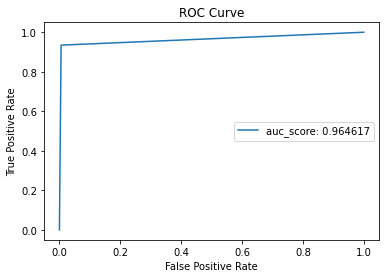

In [20]:
def draw_roc(actual,pred):
    fpr,tpr,threshold=metrics.roc_curve(actual,pred,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,pred)
    plt.plot(fpr,tpr,label='auc_score: %f' %auc_score)
    plt.legend(loc='center right')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
draw_roc(y_test,y_test_predicted) 

### Bernoulli Naive Bayes

In [21]:
bnb=BernoulliNB()
bnb.fit(X_train_transformed,y_train)

BernoulliNB()

In [22]:
y_test_pred_bnb=bnb.predict(X_test_transformed)
y_test_pred_bnb

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
accuracy=metrics.accuracy_score(y_test,y_test_pred_bnb)
print('accuracy: %f'%accuracy)

accuracy: 0.973086


In [24]:
metrics.confusion_matrix(y_test,y_test_pred_bnb)

array([[1441,    1],
       [  44,  186]], dtype=int64)

In [25]:
sensitivity_bnb = 186/(44+186)
specificity_bnb = 1441/(1441+1)
auc_bnb=metrics.roc_auc_score(y_test,y_test_pred_bnb)
print('accuracy:    %f'%accuracy)
print('sensitivity: %f'%sensitivity_bnb)
print('specificity: %f'%specificity_bnb)

accuracy:    0.973086
sensitivity: 0.808696
specificity: 0.999307


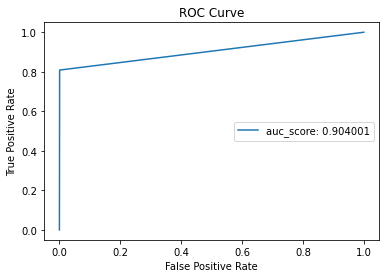

In [26]:
draw_roc(y_test,y_test_pred_bnb)

### Comparing the Multinominal and Bernoulli Naive Bayes Models:

In [27]:
print('                Multinominal            Bernoulli')
print(f'Accuracy   :  {accuracy_test}     {accuracy}')
print(f'Sensitivity:  {sensitivity}    {sensitivity_bnb}')
print(f'Specificity:  {specificity}    {specificity_bnb}')
print(f'auc_score  :  {auc_mnb}     {auc_bnb}')

                Multinominal            Bernoulli
Accuracy   :  0.986244019138756     0.9730861244019139
Sensitivity:  0.9347826086956522    0.808695652173913
Specificity:  0.9944521497919556    0.9993065187239945
auc_score  :  0.964617379243804     0.9040010854489537


**From the two models we can see that the Beroulli model has high specificity and relatively low accuracy,sensitivity and auc_score.**


**But in this case we want to achieve high specificity ie. we want the model to identify all the ham sms correctly even at the expence of predicting the spam sms as ham sometimes. Here we do not want the model to misclassify the ham sms.**

**Hence as per our requirement the best model would be Bernoullis model even at the expence of accuracy,sensitivity and auc_score.**

**Bernoullis model correctly classifies 99.93% of ham sms.**

**Hence we can go ahead with this model and use it for classifying the sms into spam or ham class.**